# **Local Food Wastage Management System**

### GitHub Link - [Link](https://github.com/Meet-official/Management-System.git) 

### 1. Undersatnding the Dataset

#### Loading the datasets

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import folium

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [ ]:
provider_data=pd.read_csv('https://github.com/Meet-official/Management-System/raw/refs/heads/main/data/providers_data.csv')
receiver_data=pd.read_csv('https://github.com/Meet-official/Management-System/raw/refs/heads/main/data/receivers_data.csv')
claims_data=pd.read_csv('https://github.com/Meet-official/Management-System/raw/refs/heads/main/data/claims_data.csv')
listings_data=pd.read_csv('https://github.com/Meet-official/Management-System/raw/refs/heads/main/data/food_listings_data.csv')
datasets={'provider_data':provider_data,'receiver_data':receiver_data,'claims_data':claims_data,'listings_data':listings_data}

#### First view of the dataset

##### 1. Provider's Dataset

In [37]:
provider_data.head()

,Provider_ID,Name,Type,Address,City,Contact
0,1,Gonzales-Cochran,Supermarket,"74347 Christopher Extensions\nAndreamouth, OK ...",New Jessica,+1-600-220-0480
1,2,"Nielsen, Johnson and Fuller",Grocery Store,"91228 Hanson Stream\nWelchtown, OR 27136",East Sheena,+1-925-283-8901x6297
2,3,Miller-Black,Supermarket,"561 Martinez Point Suite 507\nGuzmanchester, W...",Lake Jesusview,001-517-295-2206
3,4,"Clark, Prince and Williams",Grocery Store,"467 Bell Trail Suite 409\nPort Jesus, IA 61188",Mendezmouth,556.944.8935x401
4,5,Coleman-Farley,Grocery Store,"078 Matthew Creek Apt. 319\nSaraborough, MA 53978",Valentineside,193.714.6577


##### 2. Receiver's Dataset

In [38]:
receiver_data.head()

,Receiver_ID,Name,Type,City,Contact
0,1,Donald Gomez,Shelter,Port Carlburgh,(955)922-5295
1,2,Laurie Ramos,Individual,Lewisburgh,761.042.1570
2,3,Ashley Mckee,NGO,South Randalltown,691-023-0094x856
3,4,Erika Rose,NGO,South Shaneville,8296491111
4,5,John Romero,Individual,Bakerport,067.491.0154


##### 3. Claiming Dataset

In [39]:
claims_data.head()

,Claim_ID,Food_ID,Receiver_ID,Status,Timestamp
0,1,164,908,Pending,3/5/2025 5:26
1,2,353,391,Cancelled,3/11/2025 10:24
2,3,626,492,Completed,3/21/2025 0:59
3,4,61,933,Cancelled,3/4/2025 9:08
4,5,345,229,Pending,3/14/2025 15:17


##### 4. Listings Dataset

In [40]:
listings_data.head()

,Food_ID,Food_Name,Quantity,Expiry_Date,Provider_ID,Provider_Type,Location,Food_Type,Meal_Type
0,1,Bread,43,3/17/2025,110,Grocery Store,South Kellyville,Non-Vegetarian,Breakfast
1,2,Soup,22,3/24/2025,791,Grocery Store,West James,Non-Vegetarian,Dinner
2,3,Fruits,46,3/28/2025,478,Catering Service,Lake Regina,Vegan,Breakfast
3,4,Fruits,15,3/16/2025,930,Restaurant,Kellytown,Vegan,Lunch
4,5,Soup,14,3/19/2025,279,Restaurant,Garciaport,Vegan,Dinner


#### Dimensions of each dataset

In [41]:
for i in datasets:
    print(f'Rows and Columns count in {i}: {datasets[i].shape}')

Rows and Columns count in provider_data: (1000, 6)
Rows and Columns count in receiver_data: (1000, 5)
Rows and Columns count in claims_data: (1000, 5)
Rows and Columns count in listings_data: (1000, 9)


#### Missing/Null Values in Dataset

In [42]:
for i in datasets:
    print(f'Null values count in {i}:{datasets[i].isnull().sum().sum()}')

Null values count in provider_data:0
Null values count in receiver_data:0
Null values count in claims_data:0
Null values count in listings_data:0


#### Unique Values

In [43]:
for i in datasets:
    print('__________________')
    print(f'Unique values in {i}')
    print(datasets[i].nunique())
    print('__________________')

__________________
Unique values in provider_data
Provider_ID    1000
Name            973
Type              4
Address        1000
City            963
Contact        1000
dtype: int64
__________________
__________________
Unique values in receiver_data
Receiver_ID    1000
Name            992
Type              4
City            966
Contact        1000
dtype: int64
__________________
__________________
Unique values in claims_data
Claim_ID       1000
Food_ID         647
Receiver_ID     624
Status            3
Timestamp       976
dtype: int64
__________________
__________________
Unique values in listings_data
Food_ID          1000
Food_Name          10
Quantity           50
Expiry_Date        15
Provider_ID       637
Provider_Type       4
Location          624
Food_Type           3
Meal_Type           4
dtype: int64
__________________


#### Dataset Information

In [44]:
for i in datasets:
    print(i)
    print(datasets[i].info())
    print('\n')

provider_data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Provider_ID  1000 non-null   int64 
 1   Name         1000 non-null   object
 2   Type         1000 non-null   object
 3   Address      1000 non-null   object
 4   City         1000 non-null   object
 5   Contact      1000 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB
None


receiver_data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Receiver_ID  1000 non-null   int64 
 1   Name         1000 non-null   object
 2   Type         1000 non-null   object
 3   City         1000 non-null   object
 4   Contact      1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB
None


claims_data
<class 'pandas.core

#### Dataset Description 

In [45]:
for i in datasets:
    print(f'Description of {i}')
    print(datasets[i].describe())
    print('\n')

Description of provider_data
       Provider_ID
count  1000.000000
mean    500.500000
std     288.819436
min       1.000000
25%     250.750000
50%     500.500000
75%     750.250000
max    1000.000000


Description of receiver_data
       Receiver_ID
count  1000.000000
mean    500.500000
std     288.819436
min       1.000000
25%     250.750000
50%     500.500000
75%     750.250000
max    1000.000000


Description of claims_data
          Claim_ID      Food_ID  Receiver_ID
count  1000.000000  1000.000000  1000.000000
mean    500.500000   502.163000   492.437000
std     288.819436   292.462255   284.487869
min       1.000000     1.000000     1.000000
25%     250.750000   233.750000   256.000000
50%     500.500000   504.500000   480.500000
75%     750.250000   762.000000   742.250000
max    1000.000000   999.000000  1000.000000


Description of listings_data
           Food_ID     Quantity  Provider_ID
count  1000.000000  1000.000000     1000.000
mean    500.500000    25.794000      497.49

### 2. Data Cleaning

#### Dropping duplicates

In [46]:
for i in datasets:
    print(i)
    print(datasets[i].drop_duplicates(inplace=True))
    print('\n')

provider_data
None


receiver_data
None


claims_data
None


listings_data
None




#### 1. Provider's Dataset

##### Removing \n (newline characters) in Address

In [47]:
provider_data['Address'] = provider_data['Address'].str.replace('\n', ', ', regex=True)

##### Striping leading/trailing spaces in all string columns

In [48]:
provider_data = provider_data.apply(lambda col: col.str.strip() if col.dtype == 'object' else col)

##### Standardizing text case

In [49]:
provider_data['City'] = provider_data['City'].str.title()
provider_data['Type'] = provider_data['Type'].str.title()

##### Validating Contact format

In [50]:
provider_data['Contact'] = provider_data['Contact'].str.replace(r'[^\d]', '', regex=True)

In [51]:
provider_data.head()

,Provider_ID,Name,Type,Address,City,Contact
0,1,Gonzales-Cochran,Supermarket,"74347 Christopher Extensions, Andreamouth, OK ...",New Jessica,16002200480
1,2,"Nielsen, Johnson and Fuller",Grocery Store,"91228 Hanson Stream, Welchtown, OR 27136",East Sheena,192528389016297
2,3,Miller-Black,Supermarket,"561 Martinez Point Suite 507, Guzmanchester, W...",Lake Jesusview,0015172952206
3,4,"Clark, Prince and Williams",Grocery Store,"467 Bell Trail Suite 409, Port Jesus, IA 61188",Mendezmouth,5569448935401
4,5,Coleman-Farley,Grocery Store,"078 Matthew Creek Apt. 319, Saraborough, MA 53978",Valentineside,1937146577


#### 2. Receiver's Dataset

##### Striping leading/trailing spaces in all string columns

In [52]:
receiver_data = receiver_data.apply(lambda col: col.str.strip() if col.dtype == 'object' else col)

##### Standardizing text case

In [53]:
receiver_data['Name'] = receiver_data['Name'].str.strip().str.title()
receiver_data['Type'] = receiver_data['Type'].str.strip().str.title()
receiver_data['City'] = receiver_data['City'].str.strip().str.title()

##### Validating Contact format

In [54]:
receiver_data['Contact'] = receiver_data['Contact'].str.replace(r'[^\d]', '', regex=True)

In [55]:
receiver_data.head()

,Receiver_ID,Name,Type,City,Contact
0,1,Donald Gomez,Shelter,Port Carlburgh,9559225295
1,2,Laurie Ramos,Individual,Lewisburgh,7610421570
2,3,Ashley Mckee,Ngo,South Randalltown,6910230094856
3,4,Erika Rose,Ngo,South Shaneville,8296491111
4,5,John Romero,Individual,Bakerport,0674910154


#### 3. Claiming Dataset

##### Striping leading/trailing spaces in all string columns

In [56]:
claims_data = claims_data.apply(lambda col: col.str.strip() if col.dtype == 'object' else col)

##### Standardizing text case

In [57]:
claims_data['Status']=claims_data['Status'].str.strip().str.title()

##### Handling date time columns

In [58]:
claims_data['Timestamp']=pd.to_datetime(claims_data['Timestamp'],errors='coerce')

In [59]:
claims_data.head()

,Claim_ID,Food_ID,Receiver_ID,Status,Timestamp
0,1,164,908,Pending,2025-03-05 05:26:00
1,2,353,391,Cancelled,2025-03-11 10:24:00
2,3,626,492,Completed,2025-03-21 00:59:00
3,4,61,933,Cancelled,2025-03-04 09:08:00
4,5,345,229,Pending,2025-03-14 15:17:00


#### 4. Listings data 

##### Striping leading/trailing spaces in all string columns

In [60]:
listings_data = listings_data.apply(lambda col: col.str.strip() if col.dtype == 'object' else col)

##### Standardizing text case

In [61]:
listings_data['Food_Name']=listings_data['Food_Name'].str.strip().str.title()
listings_data['Provider_Type']=listings_data['Provider_Type'].str.strip().str.title()
listings_data['Location']=listings_data['Location'].str.strip().str.title()
listings_data['Food_Type']=listings_data['Food_Type'].str.strip().str.title()
listings_data['Meal_Type']=listings_data['Meal_Type'].str.strip().str.title()

##### Handling date time columns

In [62]:
listings_data['Expiry_Date']=pd.to_datetime(listings_data['Expiry_Date'],errors='coerce')

In [63]:
listings_data.head()

,Food_ID,Food_Name,Quantity,Expiry_Date,Provider_ID,Provider_Type,Location,Food_Type,Meal_Type
0,1,Bread,43,2025-03-17,110,Grocery Store,South Kellyville,Non-Vegetarian,Breakfast
1,2,Soup,22,2025-03-24,791,Grocery Store,West James,Non-Vegetarian,Dinner
2,3,Fruits,46,2025-03-28,478,Catering Service,Lake Regina,Vegan,Breakfast
3,4,Fruits,15,2025-03-16,930,Restaurant,Kellytown,Vegan,Lunch
4,5,Soup,14,2025-03-19,279,Restaurant,Garciaport,Vegan,Dinner


### 3. Exploratory Data Analysis

#### i. Univariant Analysis

##### Providers Dataset

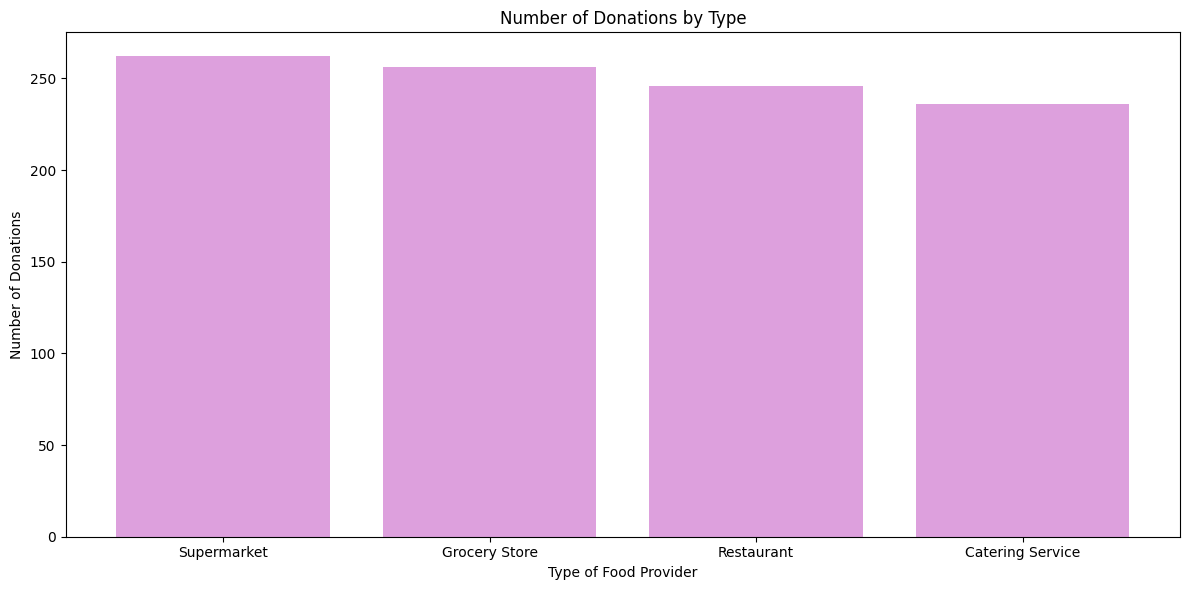

In [64]:
# Count donations per type
type_counts = provider_data['Type'].value_counts()
plt.figure(figsize=(12,6))
plt.bar(type_counts.index, type_counts.values, color='plum')
plt.title('Number of Donations by Type')
plt.xlabel('Type of Food Provider')
plt.ylabel('Number of Donations')
plt.tight_layout()
plt.show()

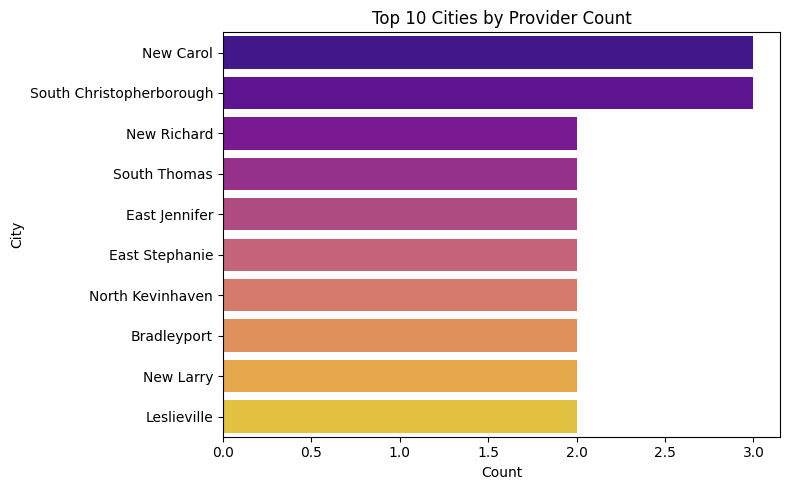

In [65]:
# Top 10 provider cities
top_cities = provider_data['City'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_cities.values, y=top_cities.index, palette="plasma")
plt.title("Top 10 Cities by Provider Count")
plt.xlabel("Count")
plt.ylabel("City")
plt.tight_layout()
plt.show()

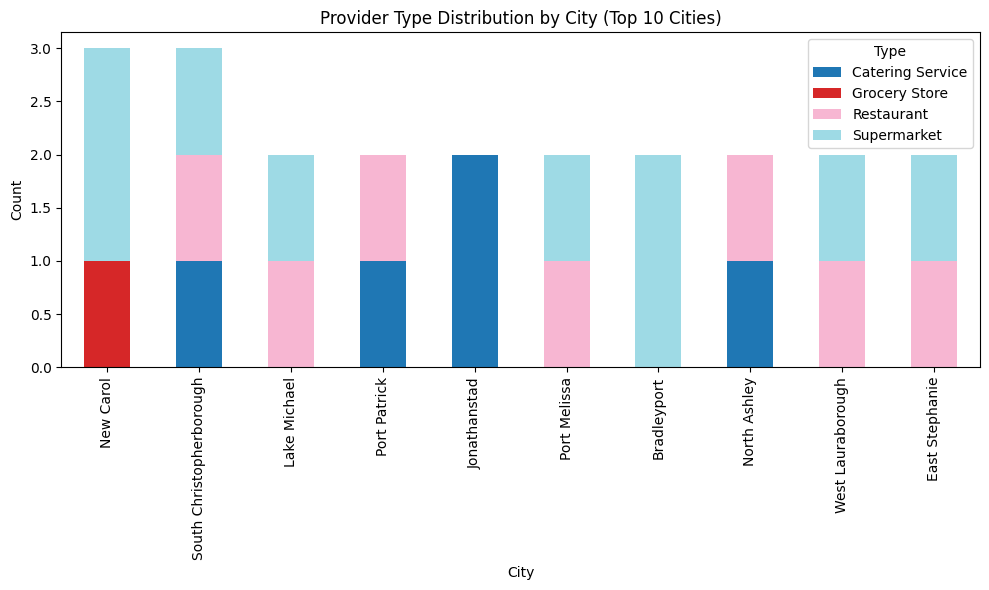

In [66]:
#  Provider type distribution by city (stacked bar)
city_type_counts = provider_data.groupby(['City', 'Type']).size().unstack(fill_value=0)
top_cities_for_stack = city_type_counts.sum(axis=1).sort_values(ascending=False).head(10)
city_type_counts.loc[top_cities_for_stack.index].plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20')
plt.title("Provider Type Distribution by City (Top 10 Cities)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

##### Receivers Dataset

Text(0, 0.5, 'Count')

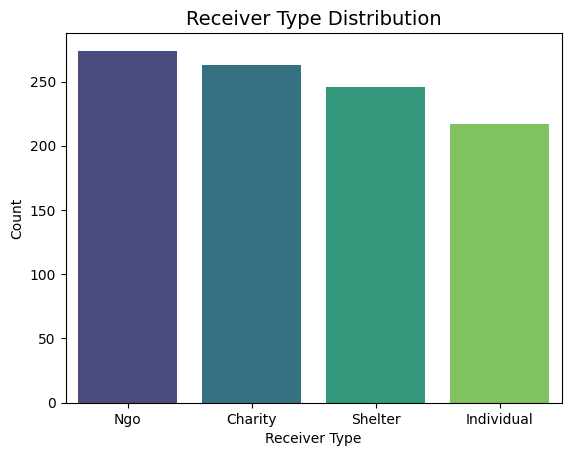

In [87]:
# Receiver type distribution (bar chart)
type_counts = receiver_data['Type'].value_counts()
sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')
plt.title('Receiver Type Distribution', fontsize=14)
plt.xlabel('Receiver Type')
plt.ylabel('Count')

Text(0, 0.5, 'City')

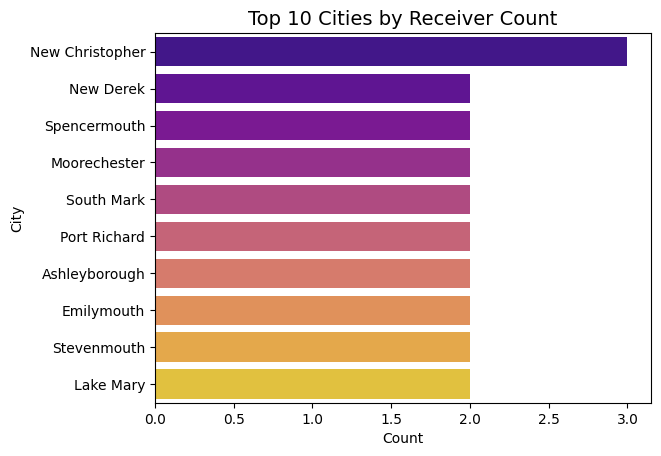

In [88]:
# Top cities by receiver count (horizontal bar chart)
city_counts = receiver_data['City'].value_counts().head(10)  # top 10
sns.barplot(x=city_counts.values, y=city_counts.index, palette='plasma')
plt.title('Top 10 Cities by Receiver Count', fontsize=14)
plt.xlabel('Count')
plt.ylabel('City')

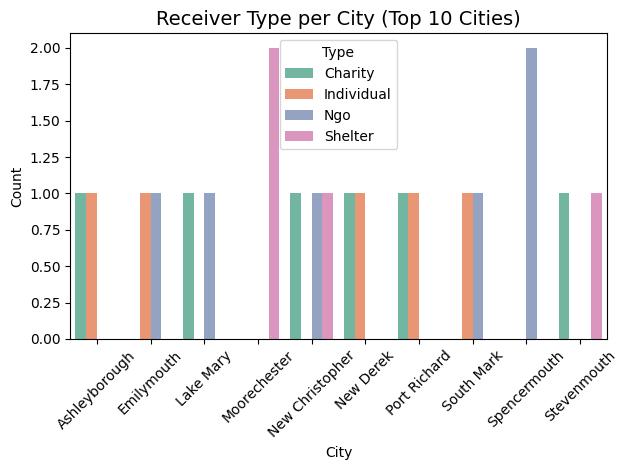

In [89]:
# Receiver type per city (grouped bar chart)
top_cities = receiver_data['City'].value_counts().head(10).index
filtered_data = receiver_data[receiver_data['City'].isin(top_cities)]
city_type_counts = filtered_data.groupby(['City', 'Type']).size().reset_index(name='Count')
sns.barplot(data=city_type_counts, x='City', y='Count', hue='Type', palette='Set2')
plt.title('Receiver Type per City (Top 10 Cities)', fontsize=14)
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

##### Claimer's Dataset

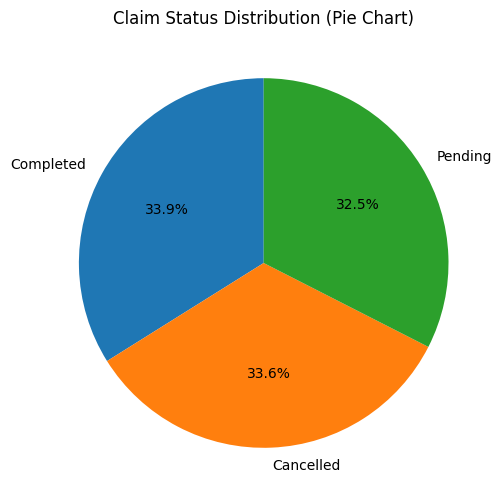

In [70]:
claims_data['Timestamp'] = pd.to_datetime(claims_data['Timestamp'])
# Claim status distribution (pie chart + bar chart)
status_counts = claims_data['Status'].value_counts()

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Claim Status Distribution (Pie Chart)')
plt.show()

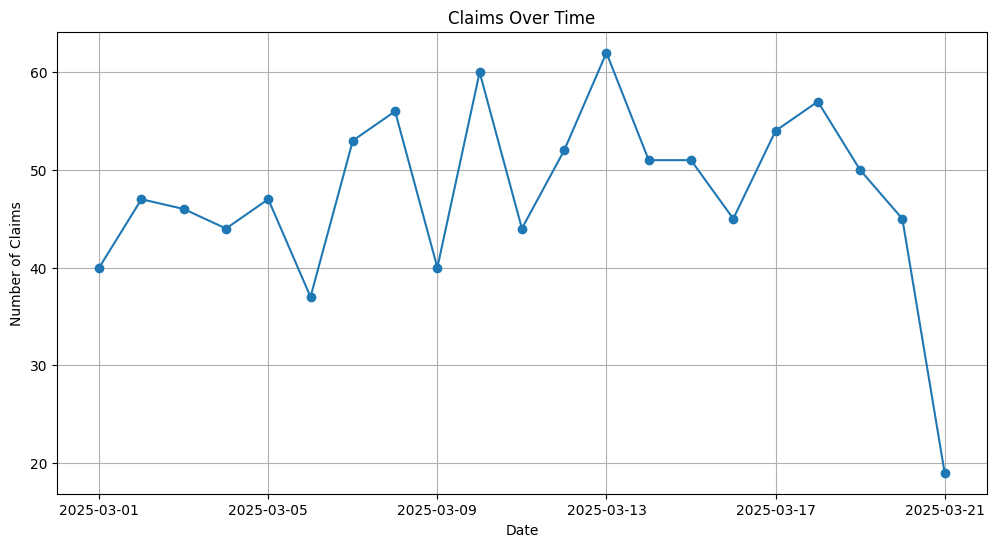

In [71]:
# Claims over time (line chart)
claims_over_time = claims_data.groupby(claims_data['Timestamp'].dt.date).size()

plt.figure(figsize=(12, 6))
claims_over_time.plot(kind='line', marker='o')
plt.title('Claims Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Claims')
plt.grid(True)
plt.show()

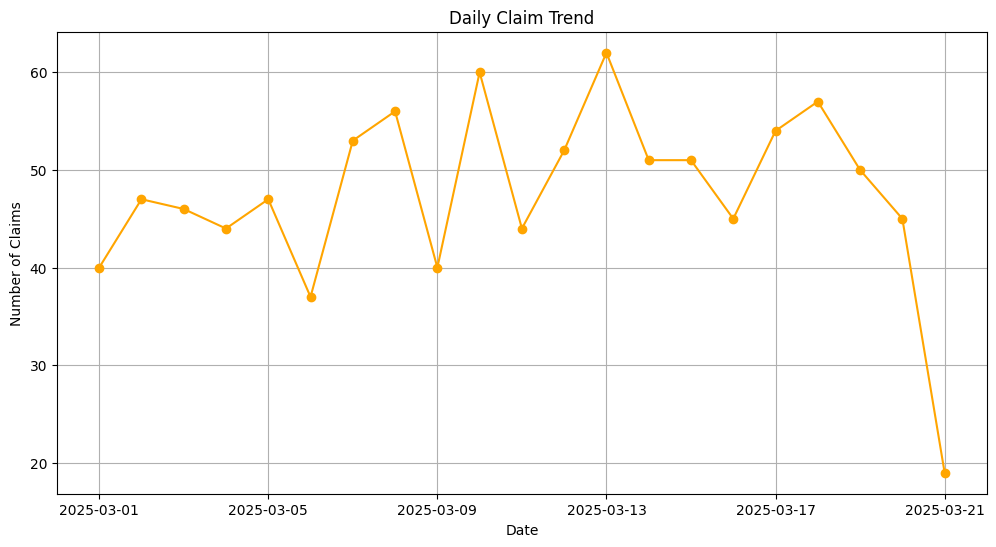

In [72]:
# Daily & Weekly claim trends
daily_claims = claims_data.groupby(claims_data['Timestamp'].dt.date).size()
plt.figure(figsize=(12, 6))
daily_claims.plot(kind='line', marker='o', color='orange')
plt.title('Daily Claim Trend')
plt.xlabel('Date')
plt.ylabel('Number of Claims')
plt.grid(True)
plt.show()

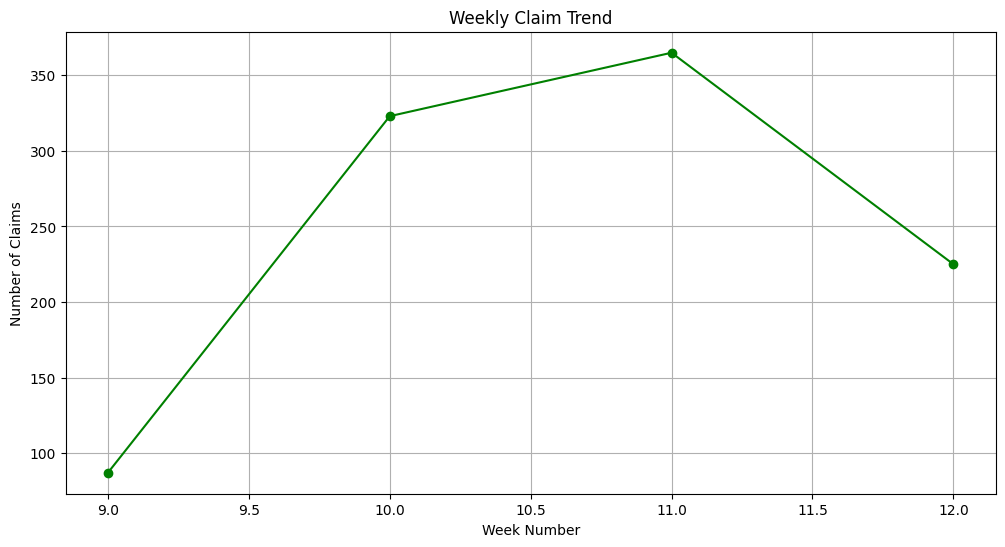

In [73]:
# Weekly
weekly_claims = claims_data.groupby(claims_data['Timestamp'].dt.isocalendar().week).size()
plt.figure(figsize=(12, 6))
weekly_claims.plot(kind='line', marker='o', color='green')
plt.title('Weekly Claim Trend')
plt.xlabel('Week Number')
plt.ylabel('Number of Claims')
plt.grid(True)
plt.show()


##### Listing's Dataset

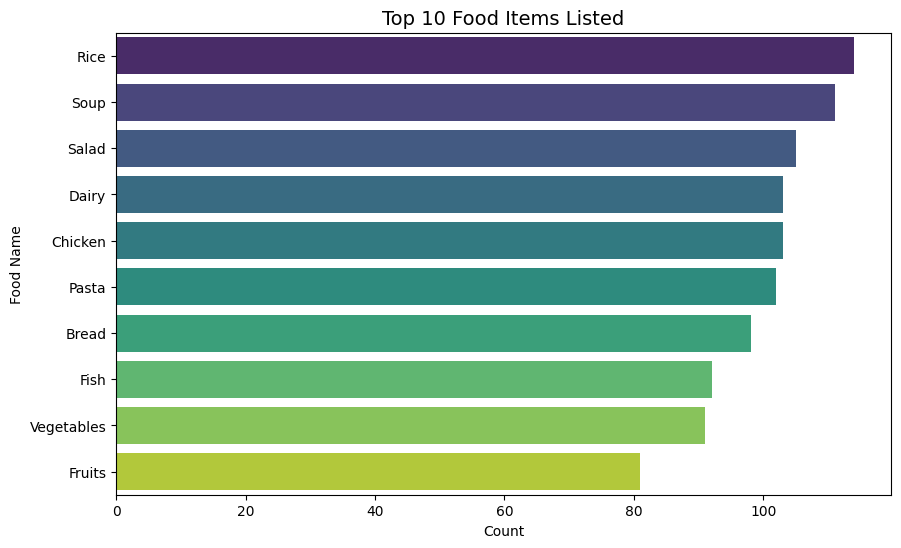

In [74]:
# Top food items listed → bar chart
top_foods = listings_data['Food_Name'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_foods.values, y=top_foods.index, palette="viridis")
plt.title("Top 10 Food Items Listed", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Food Name")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


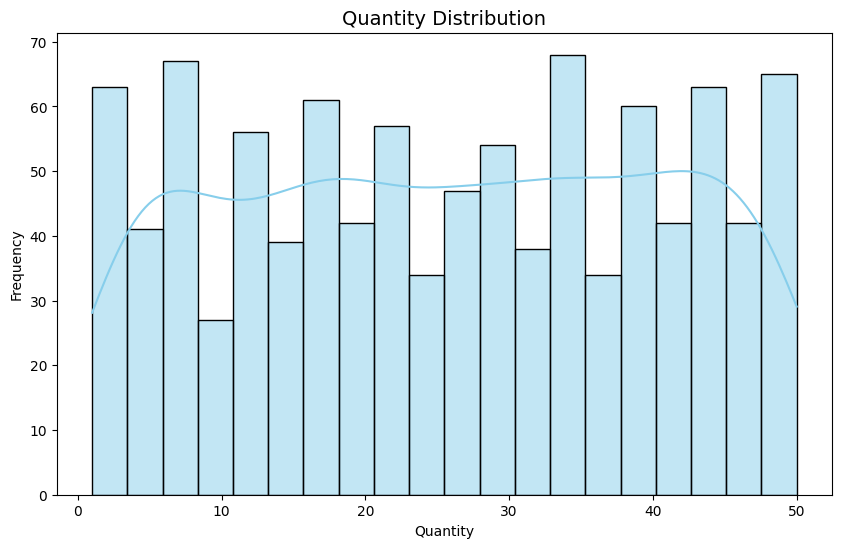

In [75]:
# Quantity distribution → histogram
plt.figure(figsize=(10,6))
sns.histplot(listings_data['Quantity'], bins=20, kde=True, color="skyblue")
plt.title("Quantity Distribution", fontsize=14)
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()

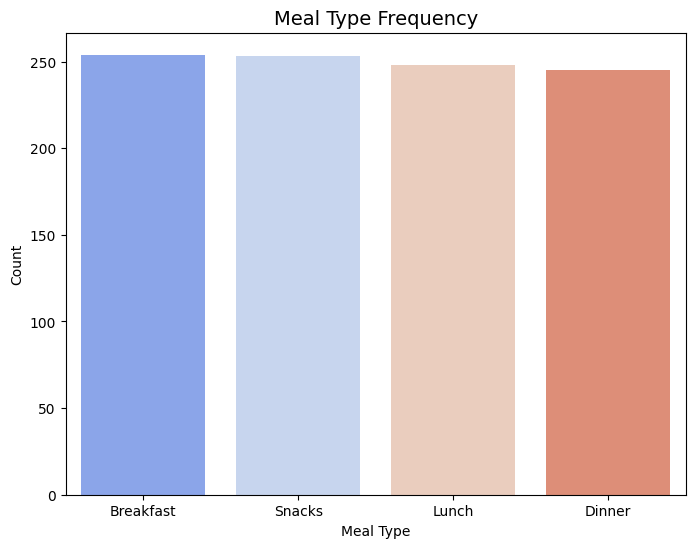

In [76]:
# Meal type frequency → bar chart
meal_counts = listings_data['Meal_Type'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=meal_counts.index, y=meal_counts.values, palette="coolwarm")
plt.title("Meal Type Frequency", fontsize=14)
plt.xlabel("Meal Type")
plt.ylabel("Count")
plt.show()

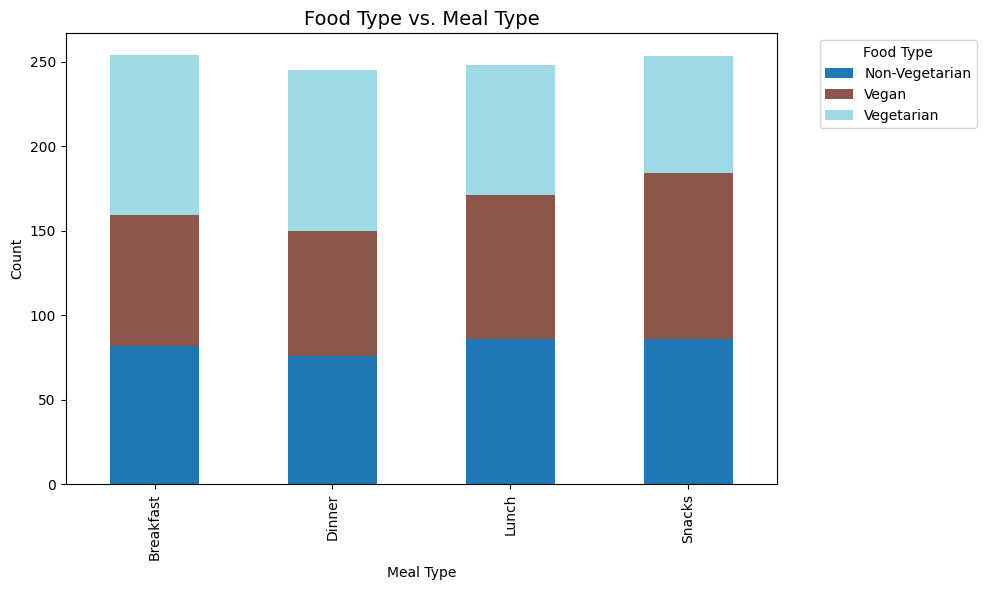

In [77]:
# Food type vs. meal type → stacked bar chart
food_meal = listings_data.groupby(['Meal_Type', 'Food_Type']).size().unstack(fill_value=0)
food_meal.plot(kind="bar", stacked=True, figsize=(10,6), colormap="tab20")
plt.title("Food Type vs. Meal Type", fontsize=14)
plt.xlabel("Meal Type")
plt.ylabel("Count")
plt.legend(title="Food Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


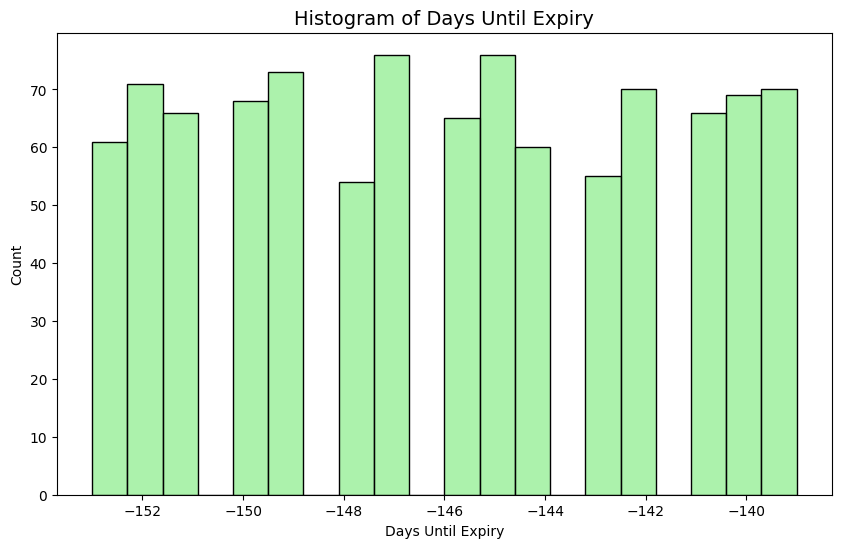

In [78]:
# Expiry dates trend → histogram of days until expiry
# Convert Expiry_Date to datetime
listings_data['Expiry_Date'] = pd.to_datetime(listings_data['Expiry_Date'], errors='coerce')
# Calculate days until expiry from today
today = pd.Timestamp.today()
listings_data['Days_Until_Expiry'] = (listings_data['Expiry_Date'] - today).dt.days
plt.figure(figsize=(10,6))
sns.histplot(listings_data['Days_Until_Expiry'].dropna(), bins=20, kde=False, color="lightgreen")
plt.title("Histogram of Days Until Expiry", fontsize=14)
plt.xlabel("Days Until Expiry")
plt.ylabel("Count")
plt.show()

#### ii. Univariant Analysis

##### Provider vs Listings

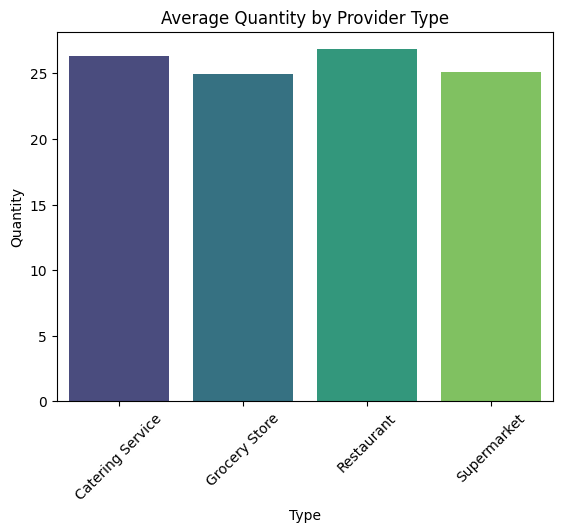

In [79]:
# Merge Provider & Listings
prov_list = listings_data.merge(provider_data, on="Provider_ID", how="left")
# Average quantity by provider type
avg_qty = prov_list.groupby("Type")["Quantity"].mean().reset_index()
sns.barplot(x="Type", y="Quantity", data=avg_qty, palette="viridis")
plt.title("Average Quantity by Provider Type")
plt.xticks(rotation=45)
plt.show()

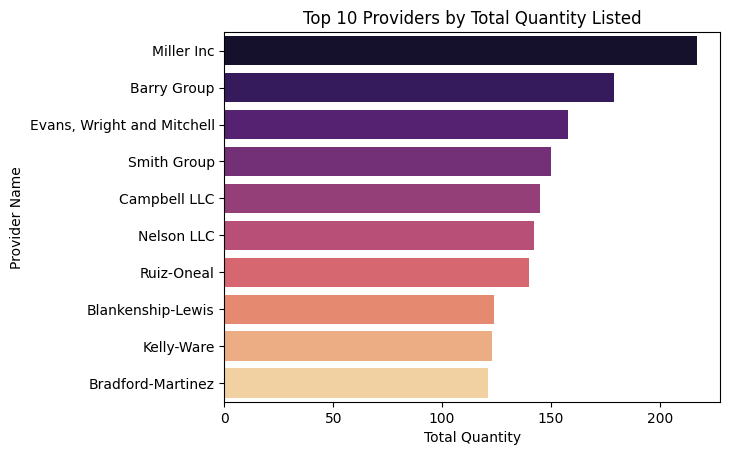

In [80]:
# Top providers by total quantity listed
top_prov = prov_list.groupby("Name")["Quantity"].sum().nlargest(10).reset_index()
sns.barplot(y="Name", x="Quantity", data=top_prov, palette="magma")
plt.title("Top 10 Providers by Total Quantity Listed")
plt.xlabel("Total Quantity")
plt.ylabel("Provider Name")
plt.show()

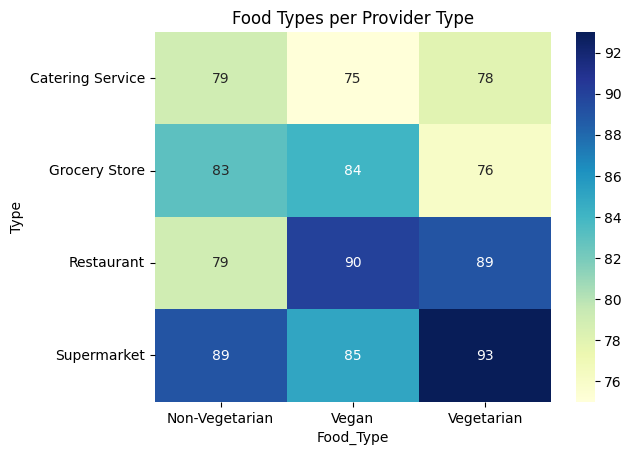

In [81]:
# Food types per provider type → heatmap
food_type_counts = prov_list.groupby(["Type", "Food_Type"]).size().unstack(fill_value=0)
sns.heatmap(food_type_counts, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Food Types per Provider Type")
plt.show()

##### Receiver vs Claims

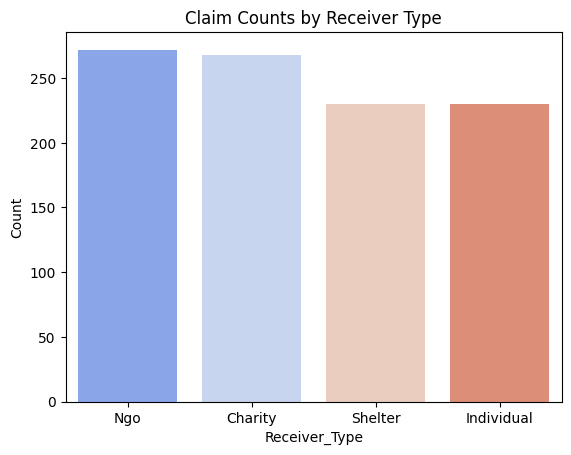

In [82]:
# Merge Receiver & Claims
recv_claims = claims_data.merge(receiver_data, on="Receiver_ID", how="left")
#  Claim counts by receiver type
claim_counts = recv_claims["Type"].value_counts().reset_index()
claim_counts.columns = ["Receiver_Type", "Count"]
sns.barplot(x="Receiver_Type", y="Count", data=claim_counts, palette="coolwarm")
plt.title("Claim Counts by Receiver Type")
plt.show()

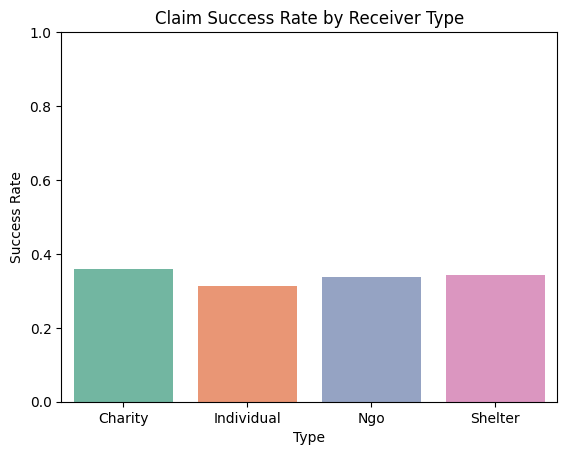

In [83]:
# Claim success rate by receiver type (Completed / Total)
success_rate = recv_claims.groupby("Type")["Status"].apply(lambda x: (x == "Completed").mean()).reset_index()
sns.barplot(x="Type", y="Status", data=success_rate, palette="Set2")
plt.title("Claim Success Rate by Receiver Type")
plt.ylabel("Success Rate")
plt.ylim(0, 1)
plt.show()

##### Claims vs Listings

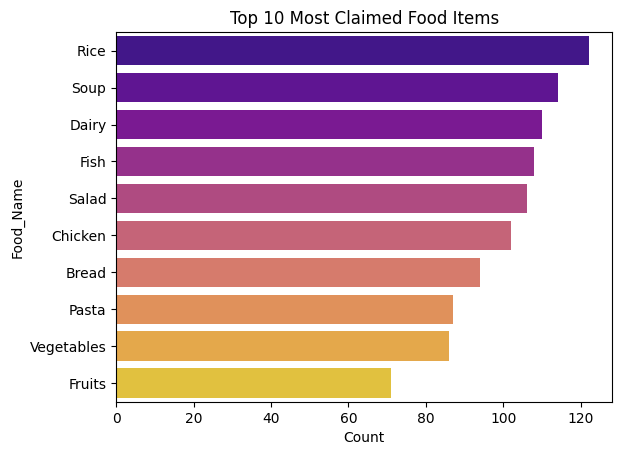

In [84]:
# Merge Claims & Listings
claims_list = claims_data.merge(listings_data, on="Food_ID", how="left")
# Most claimed food items
most_claimed = claims_list["Food_Name"].value_counts().nlargest(10).reset_index()
most_claimed.columns = ["Food_Name", "Count"]
sns.barplot(x="Count", y="Food_Name", data=most_claimed, palette="plasma")
plt.title("Top 10 Most Claimed Food Items")
plt.show()

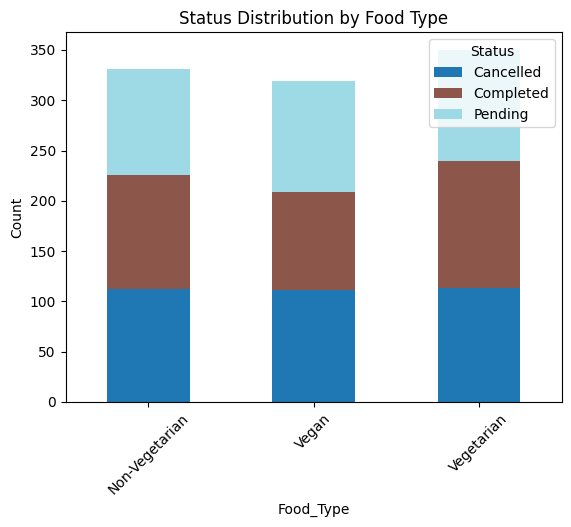

In [85]:
# Status distribution by food type → stacked bar chart
status_food = claims_list.groupby(["Food_Type", "Status"]).size().unstack(fill_value=0)
status_food.plot(kind="bar", stacked=True, colormap="tab20")
plt.title("Status Distribution by Food Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#### iii. Multi-Variant

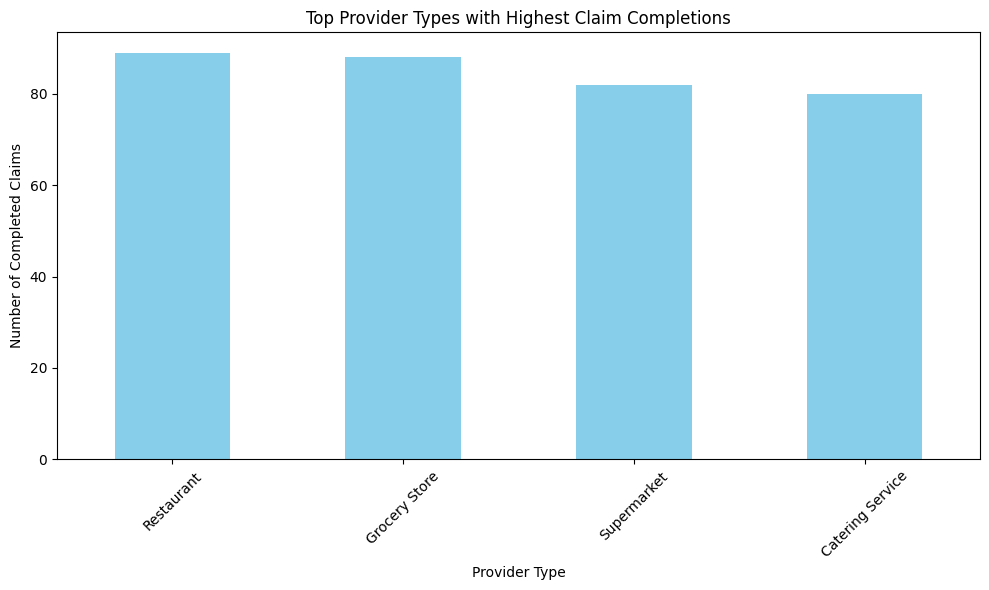

In [92]:
# Merge provider and listings
provider_listings = pd.merge(listings_data, provider_data,
                             on="Provider_ID",
                             how="left")
# Merge that with claims
merged_df = pd.merge(provider_listings, claims_data,
                     on="Food_ID",
                     how="left")
# Filter only completed claims
completed_claims = merged_df[merged_df["Status"] == "Completed"]
# Top provider types with highest claim completions
top_provider_types = (completed_claims
                      .groupby("Type")["Claim_ID"]
                      .count()
                      .sort_values(ascending=False))

plt.figure(figsize=(10, 6))
top_provider_types.plot(kind="bar", color="skyblue")
plt.title("Top Provider Types with Highest Claim Completions")
plt.xlabel("Provider Type")
plt.ylabel("Number of Completed Claims")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_36/2100691801.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ).apply(lambda x: (x["Status"] == "Completed").mean()).reset_index()


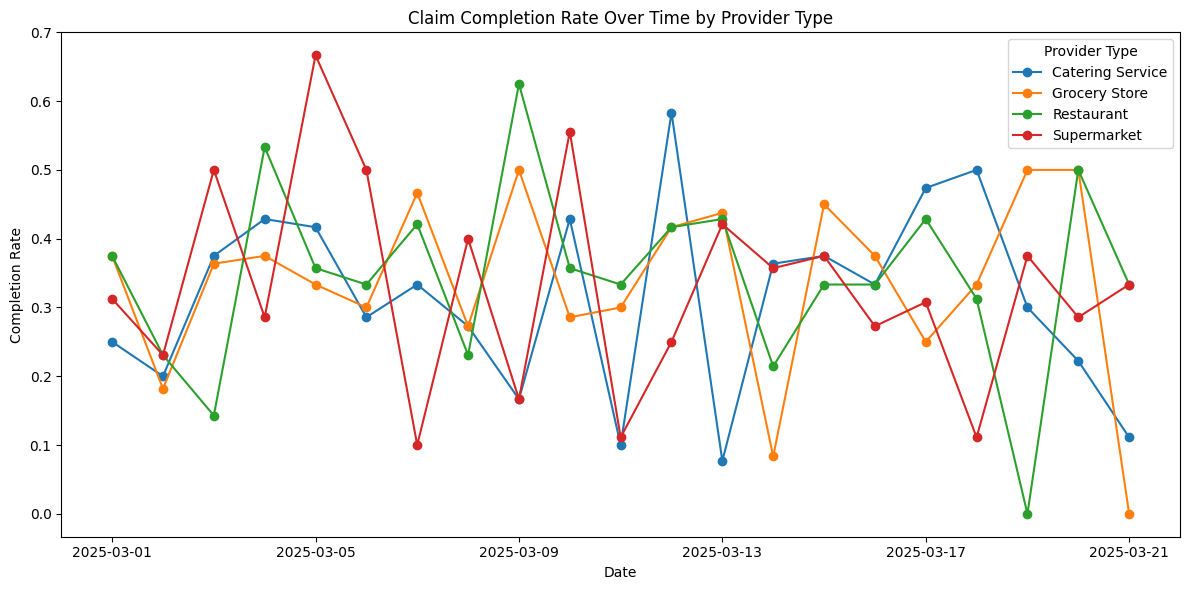

In [93]:
# Claim completion rate over time by provider type
# Convert Timestamp to datetime
merged_df["Timestamp"] = pd.to_datetime(merged_df["Timestamp"], errors="coerce")

# Group by provider type & date
completion_data = merged_df.groupby(
    [merged_df["Timestamp"].dt.date, "Type"]
).apply(lambda x: (x["Status"] == "Completed").mean()).reset_index()

completion_data.columns = ["Date", "Provider_Type", "Completion_Rate"]

plt.figure(figsize=(12, 6))
for p_type in completion_data["Provider_Type"].unique():
    subset = completion_data[completion_data["Provider_Type"] == p_type]
    plt.plot(subset["Date"], subset["Completion_Rate"], marker="o", label=p_type)

plt.title("Claim Completion Rate Over Time by Provider Type")
plt.xlabel("Date")
plt.ylabel("Completion Rate")
plt.legend(title="Provider Type")
plt.tight_layout()
plt.show()